In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
df = pd.read_csv('bank.csv', sep=',')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
print("Columns:", df.columns.tolist())

Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [ ]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop('y', axis=1)
y = df['y']


✅ Accuracy: 0.7924753657808301

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      1742
           1       0.76      0.82      0.79      1607

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349


Confusion Matrix:
 [[1336  406]
 [ 289 1318]]


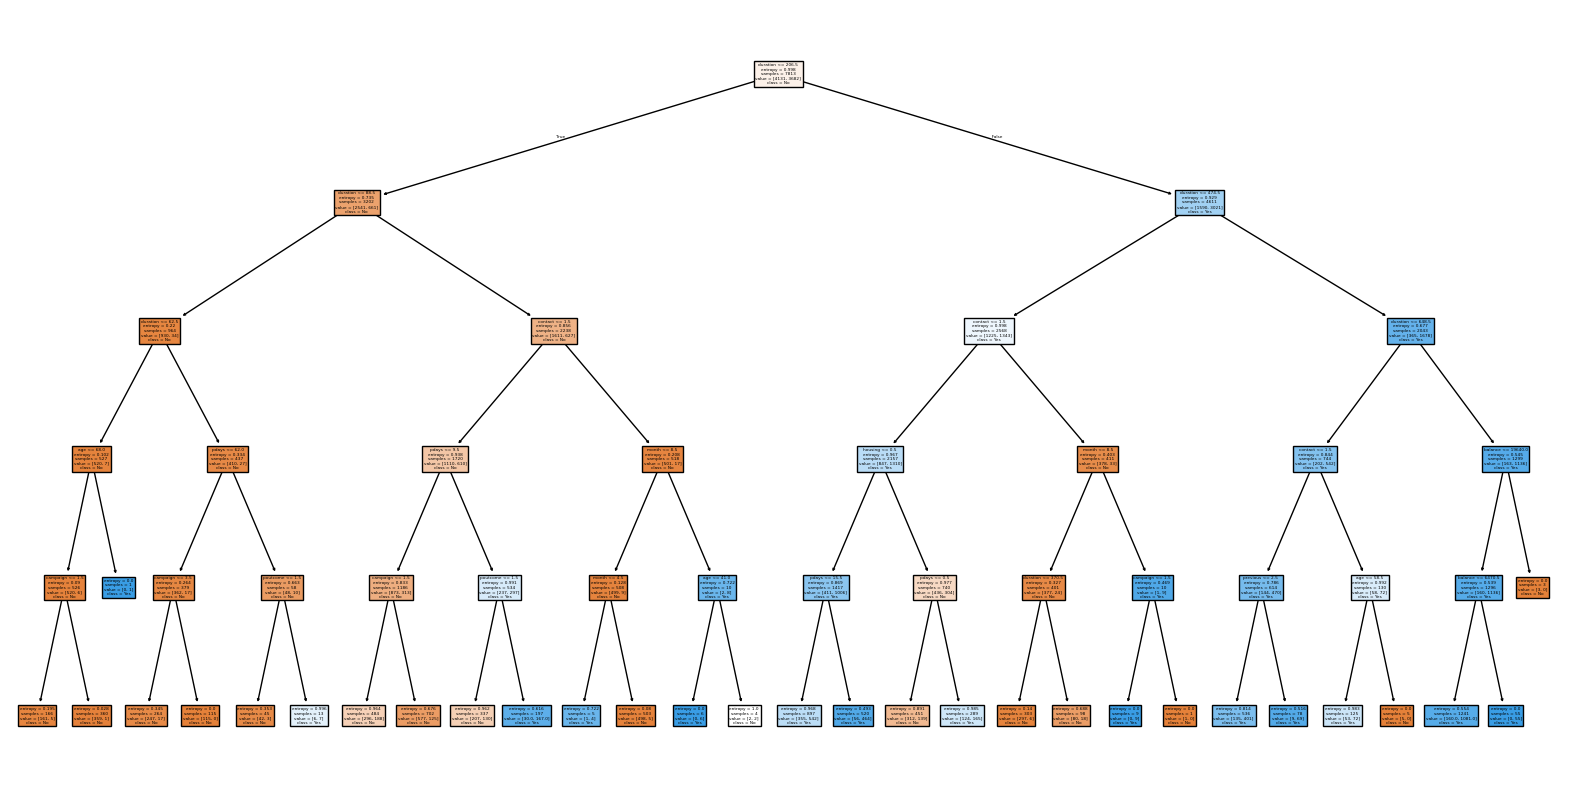

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()